# Downloading Data

In [ ]:
# upload your kaggle.json
from google.colab import files
files.upload()

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d tharakan684/urecamain

In [ ]:
!unzip /content/urecamain.zip

# Loading Data

In [ ]:
import os

train_fire_dir = os.path.join("/content/Train/Fire")
train_non_fire_dir = os.path.join("/content/Train/Non-Fire")

val_fire_dir = os.path.join("/content/Vali/Fire")
val_non_fire_dir = os.path.join("/content/Vali/Non-Fire")

In [ ]:
train_fire_fnames = os.listdir( train_fire_dir )
train_non_fire_fnames = os.listdir( train_non_fire_dir )

print(train_fire_fnames[:10])
print(train_non_fire_fnames[:10])

['dayroad372.jpg', 'SynNig462.jpg', 'SynDay1294.jpg', 'fireday751.jpg', 'SynDay1444.jpg', 'fireday670.jpg', 'fireday16.jpg', 'fireday526.jpg', 'fireday530.jpg', 'SynDay1227.jpg']
['dogs295.jpg', 'cats127.jpg', 'builds256.jpg', 'cats208.jpg', 'cats46.jpg', 'road_night606.jpg', 'builds99.jpg', 'road_night511.jpg', 'sunset1126.jpg', 'night411.jpg']


In [ ]:
print('total training fire images :', len(os.listdir(      train_fire_dir ) ))
print('total training non_fire images :', len(os.listdir(      train_non_fire_dir ) ))

print('total validation fire images :', len(os.listdir( val_fire_dir ) ))
print('total validation non_fire images :', len(os.listdir( val_non_fire_dir ) ))

total training fire images : 3003
total training non_fire images : 3000
total validation fire images : 1000
total validation non_fire images : 1000


In [ ]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 8
ncols = 8

pic_index = 0 # Index for iterating over images

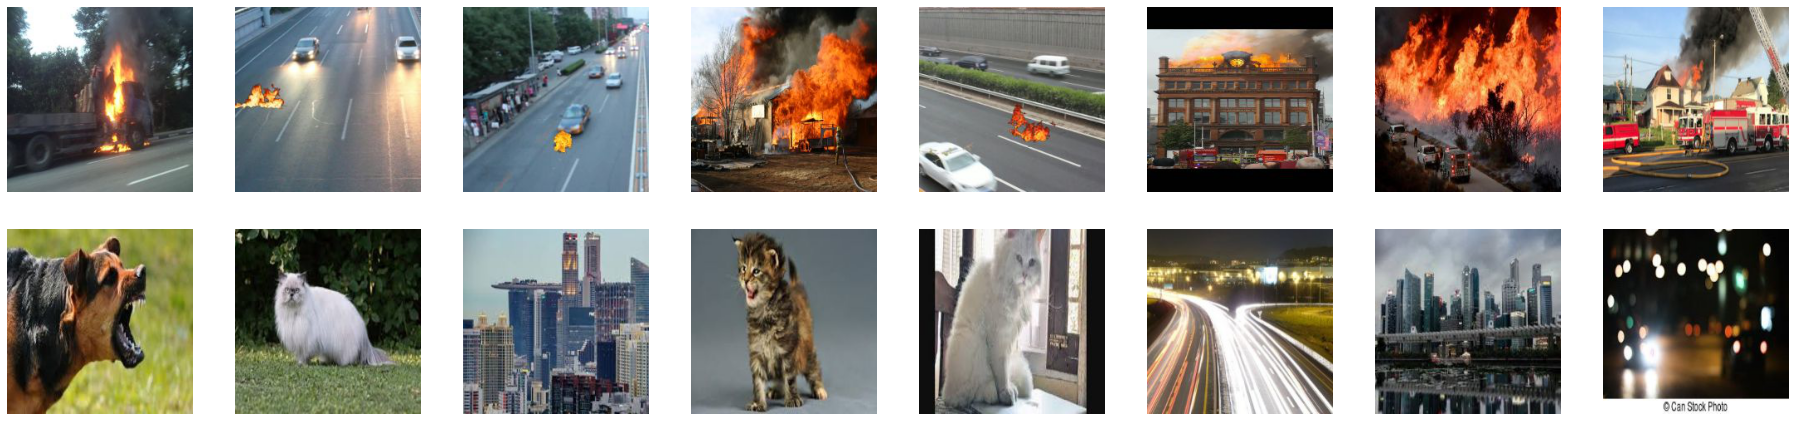

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_fire_pix = [os.path.join(train_fire_dir, fname) 
                for fname in train_fire_fnames[ pic_index-8:pic_index] 
               ]

next_non_fire_pix = [os.path.join(train_non_fire_dir, fname) 
                for fname in train_non_fire_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_fire_pix+next_non_fire_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


# The Model Architecture

In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(512, activation='relu'),

    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

# Training

In [ ]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/Train',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/content/Vali',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 6003 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'Fire': 0, 'Non-Fire': 1}

In [ ]:
steps_per_epoch = int(6003/32)
validation_steps = int(2000/32)
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=100,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/100
8/8 [==============================] - 37s 652ms/step - loss: 1.4603 - accuracy: 0.5703 - val_loss: 1.0005 - val_accuracy: 0.3555
Epoch 2/100
8/8 [==============================] - 5s 679ms/step - loss: 0.8363 - accuracy: 0.5352 - val_loss: 0.7282 - val_accuracy: 0.4258
Epoch 3/100
8/8 [==============================] - 5s 674ms/step - loss: 0.6606 - accuracy: 0.5859 - val_loss: 0.8049 - val_accuracy: 0.4102
Epoch 4/100
8/8 [==============================] - 5s 674ms/step - loss: 0.6430 - accuracy: 0.6641 - val_loss: 0.8278 - val_accuracy: 0.3789
Epoch 5/100
8/8 [==============================] - 5s 671ms/step - loss: 0.6599 - accuracy: 0.6094 - val_loss: 0.7291 - val_accuracy: 0.5117
Epoch 6/100
8/8 [==============================] - 5s 676ms/step - loss: 0.6441 - accuracy: 0.6211 - val_loss: 0.8235 - val_accuracy: 0.4844
Epoch 7/100
8/8 [==============================] - 5s 672ms/step - loss: 0.6639 - accuracy: 0.6016 - val_loss: 0.7482 - val_accuracy: 0.5352
Epoch 8/100


# Plotting Accuracy and Loss

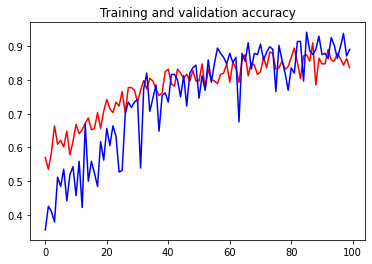

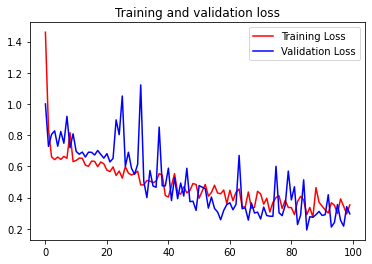

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Saving the model

In [ ]:
saved_model_path = "/content/drive/MyDrive/Capstone/fire_detection_v2.h5"

model.save(saved_model_path)

# Additional

In [ ]:
import tensorflow as tf
model = tf.keras.models.load_model("/content/drive/MyDrive/Capstone/fire_detection.h5")

In [ ]:
import numpy as np
from keras.preprocessing import image
path = "/content/drive/MyDrive/Capstone/sandal.jpg"
img = image.load_img(path, target_size=(300,300))

x = image.img_to_array(img)
x = tf.expand_dims(x, axis=0)

prediction = model.predict(x)
print(prediction)
print(path + " is not fire" if prediction[0][0] > 0 else path + " is fire")


[[1.]]
/content/drive/MyDrive/Capstone/sandal.jpg is not fire


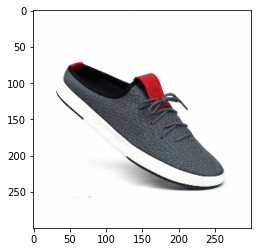

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(img)